# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [351]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = study_results.merge(mouse_metadata, how = 'left',on = 'Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [354]:
# Checking the number of mice.
len(combined_df['Mouse ID'].unique())

249

In [355]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = combined_df.groupby(['Mouse ID', 'Timepoint'])['Metastatic Sites'].nunique().reset_index(drop = False)
duplicates.loc[duplicates['Metastatic Sites'] > 1 ,'Mouse ID']

589    g989
Name: Mouse ID, dtype: object

In [356]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_df_duplicateset = combined_df[combined_df['Mouse ID']=='g989']
combined_df_duplicateset

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [357]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_df_clean = combined_df[combined_df['Mouse ID']!='g989']
combined_df_clean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [358]:
# Checking the number of mice in the clean DataFrame.
combined_df_clean['Mouse ID'].nunique()

248

In [386]:
combined_df_clean[(combined_df_clean['Mouse ID'].isin(["m601",
"k403",
"g791",
"m601",
"y793",
"r554",
"j913",
"n364",
"y793",
"j913",
"u364"])) & combined_df_clean['Drug Regimen'] == 'Infubinol']

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)


## Summary Statistics

In [384]:
combined_df_clean[combined_df_clean['Drug Regimen']=='Infubinol']['Tumor Volume (mm3)'].sort_values()

420     36.321346
29      45.000000
223     45.000000
193     45.000000
192     45.000000
          ...    
1779    67.685569
1611    67.821420
1804    67.973419
1748    69.428141
1781    72.226731
Name: Tumor Volume (mm3), Length: 178, dtype: float64

In [359]:
combined_df_clean['Tumor Volume (mm3)'].describe()

count    1880.000000
mean       50.435293
std         8.914197
min        22.050126
25%        45.000000
50%        48.933454
75%        56.324075
max        78.567014
Name: Tumor Volume (mm3), dtype: float64

In [360]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
clean_mean = combined_df_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
clean_median = combined_df_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
clean_variance = combined_df_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
clean_std = combined_df_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
clean_sem = combined_df_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
combined_summary_stats = pd.DataFrame({'Mean Tumor Volume': clean_mean,'Median Tumor Volume': clean_median,
                          'Tumor Volume Variance': clean_variance,'Tumor Volume Std. Dev.': clean_std,
                          'Tumor Volume Std. Err.': clean_sem})
combined_summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [361]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = combined_df_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg([
    'mean','median','var','std','sem']).rename(columns = {'mean':'Mean Tumor Volume','median':'Median Tumor Volume',
                                              'var':'Tumor Volume Variance','std':'Tumor Volume Std. Dev.',
                                              'sem':'Tumor Volume Std. Err.',})
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

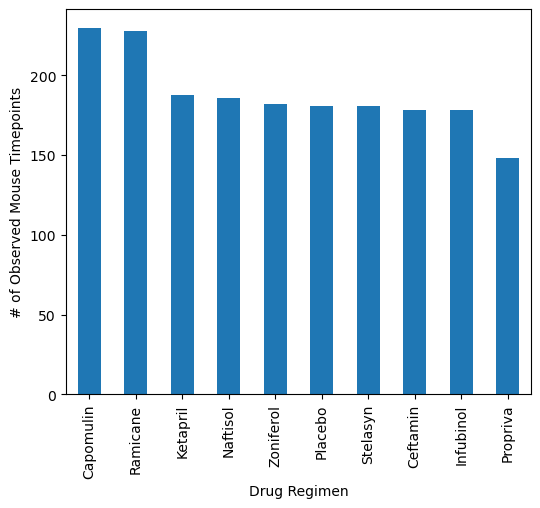

<Figure size 640x480 with 0 Axes>

In [362]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_data2 = combined_df_clean.groupby(['Drug Regimen'])['Timepoint'].count().sort_values(ascending = False)
count_chart = bar_data2.plot(kind='bar', figsize=(6,5))

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("# of Observed Mouse Timepoints")

plt.show()
plt.tight_layout()

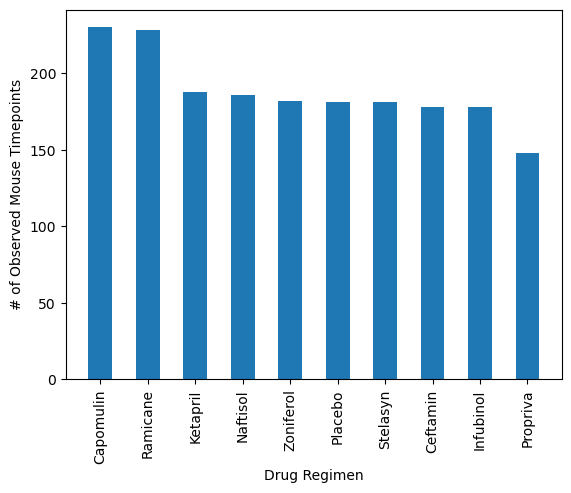

In [363]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
bar_data1 = combined_df_clean.groupby(['Drug Regimen'])['Timepoint'].count().sort_values(ascending = False)
x_axis_bar = bar_data1.index
y_axis_bar = bar_data1.values
plt.bar(x_axis_bar,y_axis_bar, align = 'center',width = .5)
plt.xticks(rotation = 90)
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.show()

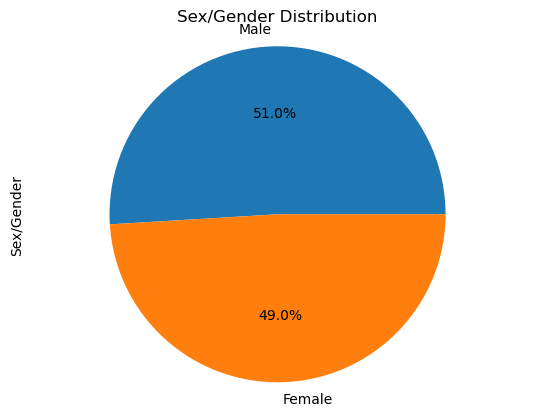

In [364]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mf =combined_df_clean['Sex'].value_counts()
mf.index

branch_pie = mf.plot(kind="pie", title=("Sex/Gender Distribution"),autopct="%1.1f%%")
branch_pie.set_ylabel('Sex/Gender')

plt.axis("equal")
plt.show()

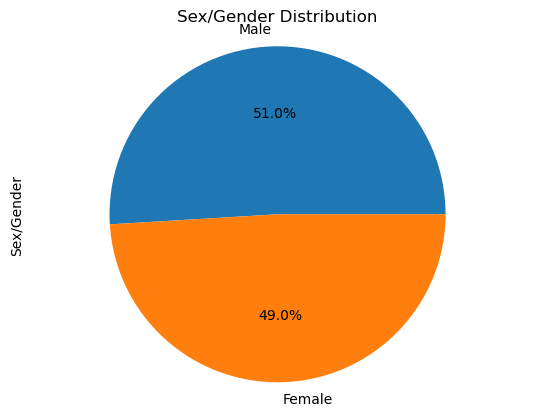

In [365]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(mf, labels=mf.index,
        autopct="%1.1f%%")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.ylabel('Sex/Gender')
plt.title("Sex/Gender Distribution")
plt.show()

## Quartiles, Outliers and Boxplots

In [369]:
max_life= combined_df_clean.groupby(['Mouse ID'])['Timepoint'].max().reset_index(
).rename(columns={'Timepoint':'Last Timepoint'})

new_cmb_df = combined_df_clean.merge(max_life, how = 'right', on = 'Mouse ID')
# last_only= new_cmb_df[new_cmb_df['Timepoint'] ==new_cmb_df['Last Timepoint']][['Drug Regimen',
#                                                                                'Last Timepoint','Tumor Volume (mm3)']]

last_only = last_only.loc[last_only['Drug Regimen'].isin(["Capomulin","Ramicane", "Infubinol","Ceftamin"]),
                         ['Drug Regimen','Tumor Volume (mm3)']].reset_index(drop=True)


In [393]:
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
tumor_vol = []

In [394]:
for i,treatment in enumerate(treatments):
    tumor_vol.append(list(last_only[last_only['Drug Regimen'] == treatment]['Tumor Volume (mm3)']))
    tumor_vol_df = pd.DataFrame(tumor_vol[i]).reset_index(drop=True)
    quartiles = tumor_vol_df.quantile([.25,.5,.75])
    lowerq = quartiles.loc[0.25]
    upperq = quartiles.loc[0.75]
    iqr = upperq-lowerq
    lower_bound = float(lowerq - (1.5*iqr))
    upper_bound = float(upperq + (1.5*iqr))
    outliers = []
    for tumor in tumor_vol[i]:
        if tumor < lower_bound or tumor > upper_bound:
            outliers.append(tumor)
    print(f'{treatment} potential outliers: {outliers} ')

Capomulin potential outliers: [] 
Ramicane potential outliers: [] 
Infubinol potential outliers: [36.3213458] 
Ceftamin potential outliers: [] 


In [226]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin


# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint



In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


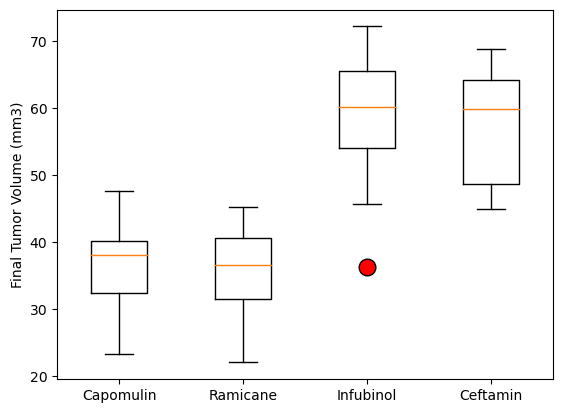

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title('Treatment Volume Distribution')
ax1.set_xlabel('Drug')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol, labels = treatments)
plt.show()

## Line and Scatter Plots

In [ ]:
combined_df_clean

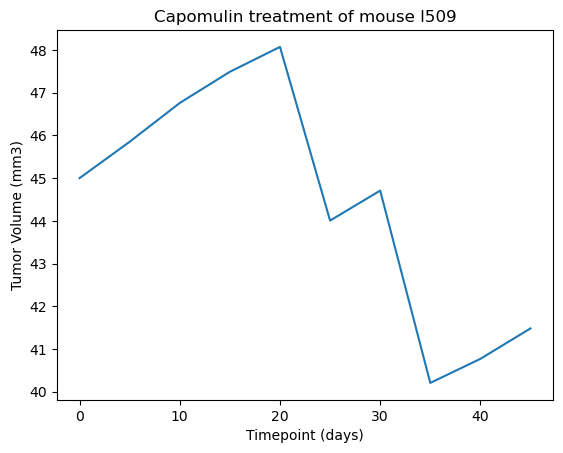

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
co

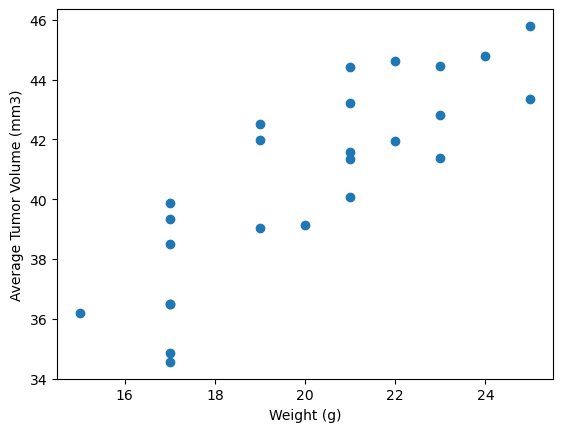

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


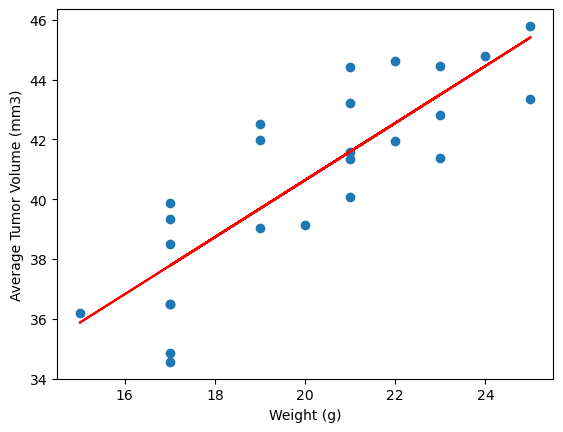

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
